Accuracy: 92.32%

Confusion Matrix:
[[769  35]
 [ 71 506]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.88      0.91       577

    accuracy                           0.92      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



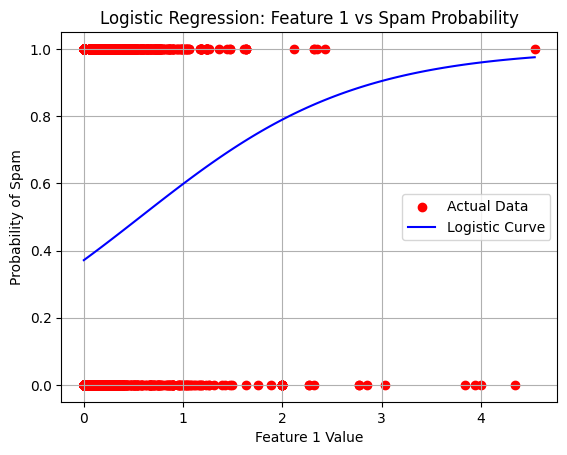

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (SpamBase dataset from UCI repository)
data = pd.read_csv('spambase.csv')  # Ensure the dataset is in the same directory or provide the full path.

# Split data into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as target (spam or not spam)

# Split data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for better performance of Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
test_probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (spam)
test_predictions = model.predict(X_test_scaled)  # Predicted classes

# Evaluate the model
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

# Visualize the relationship between one feature and spam probability
feature_index = 0  # Change this to any feature index (e.g., 0, 1, ...)
X_feature = X[:, feature_index].reshape(-1, 1)  # Extract a single feature
X_feature_scaled = scaler.fit_transform(X_feature)  # Scale the feature

# Train a Logistic Regression model on the single feature
model_feature = LogisticRegression(max_iter=1000)
model_feature.fit(X_feature_scaled, y)

# Prepare test data for visualization
X_feature_test = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
X_feature_test_scaled = scaler.transform(X_feature_test)  # Scale the test feature
predicted_probabilities = model_feature.predict_proba(X_feature_test_scaled)[:, 1]

# Plot the logistic curve
plt.scatter(X_feature, y, color='red', label='Actual Data')
plt.plot(X_feature_test, predicted_probabilities, color='blue', label='Logistic Curve')
plt.xlabel(f'Feature {feature_index + 1} Value')
plt.ylabel('Probability of Spam')
plt.title(f'Logistic Regression: Feature {feature_index + 1} vs Spam Probability')
plt.legend()
plt.grid()
plt.show()

Accuracy: 92.32%

Confusion Matrix:
[[769  35]
 [ 71 506]]

Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.92      0.96      0.94       804
        Spam       0.94      0.88      0.91       577

    accuracy                           0.92      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



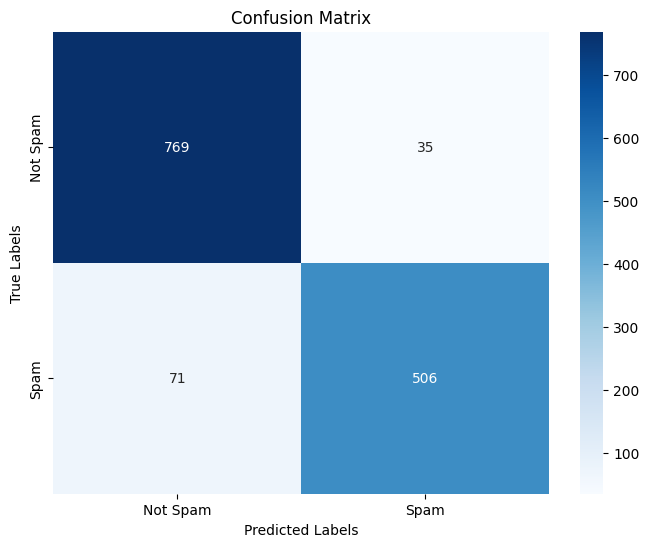

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('spambase.csv')

X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()